In [1]:
import pandas as pd

In [2]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')

bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [3]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rnd_clf = RandomForestClassifier(n_estimators = 400,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=400, n_jobs=-1)

In [7]:
y_pred = rnd_clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8125

In [9]:
important_features = pd.Series(rnd_clf.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

CD Account            0.400932
Income                0.160035
Age                   0.134165
Mortgage              0.089658
Online                0.066984
Securities Account    0.066132
Family                0.041497
Education             0.040598
dtype: float64

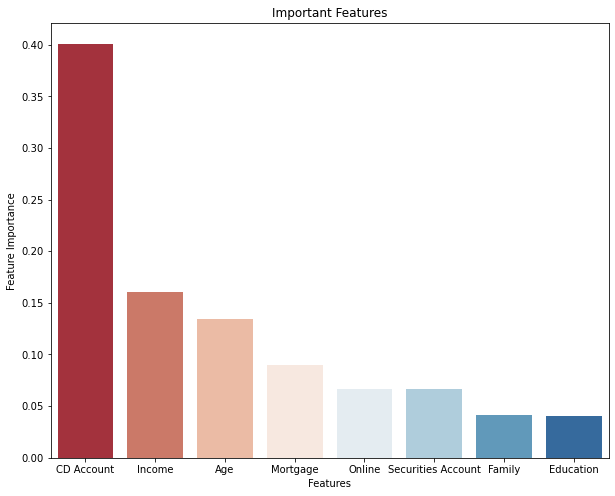

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

#### BaggingClassifier + DecisionTreeClassifier(with splitter='random') = RandomForestClassifier

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random', max_leaf_nodes=12), 
                                                   n_estimators = 400, 
                                                   max_samples = 1.0,
                                                   bootstrap = True,
                                                   n_jobs = -1)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=12,
                                                        splitter='random'),
                  n_estimators=400, n_jobs=-1)

In [13]:
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8333333333333334

### ExtraTreesClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html    
Extra-Tree Classifier is growing tree even more random by using random thresholds for each features rather than searching for best possible thresholds(like regular decision tree).

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
extra_clf = ExtraTreesClassifier(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

extra_clf.fit(x_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=600, n_jobs=-1)

In [16]:
y_pred = extra_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.78125